In this demo, we will find how the speed and 1-D velocity distributions predicted by kinetic gas theory can be found without any "derivation", using the simulation below.
First, we will import a module containing the classes for this simulation, CollidingParticles, along with some modules for plotting:

In [1]:
from CollidingParticles import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next, we will run the simulation itself. First, we create a canvas which the simulation will display in. We then create a 1x1x1 container, then create a system composed of 200 hard sphere particles inside that container. The simulation will take a minute or two to finish. Once it is done, execute the last two cells.

In [2]:
scene1 =  canvas(title='Gas in a box simulation')
container = Container(1)
system = System(average_speed = 1, number_of_particles = 200, particle_radius = 0.03, container = container, record_speeds = True, record_1d_velocities = True)
dt = 1E-2
while system.steps <= 1000:
    rate(150)
    system.simulate(dt)

<IPython.core.display.Javascript object>

We expect a 1D velocity distribution centred on 0, with the following form.

$$ \\f(v_{x}) = \sqrt{\frac{m}{2\pi k_{B}T}} e^{\frac{-mv_{x}^{2}}{2k_{B}T}}$$

Assuming the relation

$$ \\<v> = \sqrt{\frac{8k_{B}T}{m}} $$

,where v denotes the speed in this case, we can find the expected distribution for the system's 1D speed distribution, and compare it with the actual measured one.

<IPython.core.display.Javascript object>


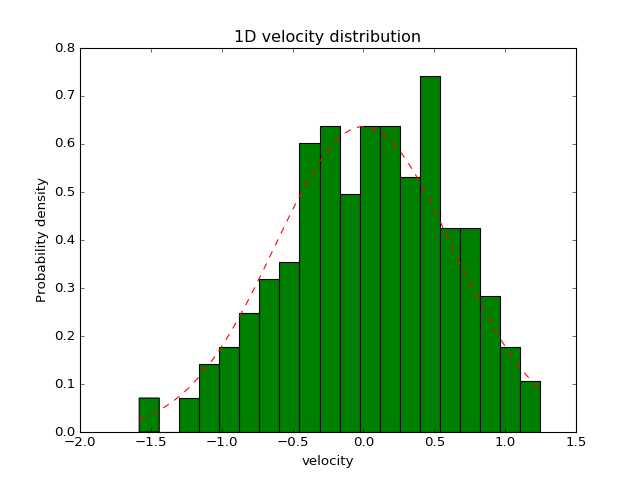

In [3]:
%matplotlib notebook
#alpha is a constant = 2kT/m
alpha = ((system.average_speed)**2) * np.pi / (4)

@np.vectorize
def f(v):
    return ((1/(alpha*np.pi))**(0.5)) * np.exp(-(v**2)/alpha)

plt.hist(system.one_d_velocities, 20, normed = True, facecolor='green')
v = np.linspace(np.amin(system.one_d_velocities),np.amax(system.one_d_velocities),50)
l = plt.plot(v, f(v), 'r--', linewidth=1)
plt.ylabel('Probability density')
plt.xlabel('velocity')
plt.title('1D velocity distribution')
plt.show()

We expect a 1D speed distribution centred on 0, with the following form.

$$ \\f(v_{x}) = \frac{m}{2\pi k_{B}T}^{\frac{3}{2}} e^{\frac{-mv^{2}}{2k_{B}T}}$$

Assuming the relation

$$ \\<v> = \sqrt{\frac{8k_{B}T}{m}} $$

again, we can find the expected distribution for the system's speed distribution, and compare it with the actual measured one.

<IPython.core.display.Javascript object>


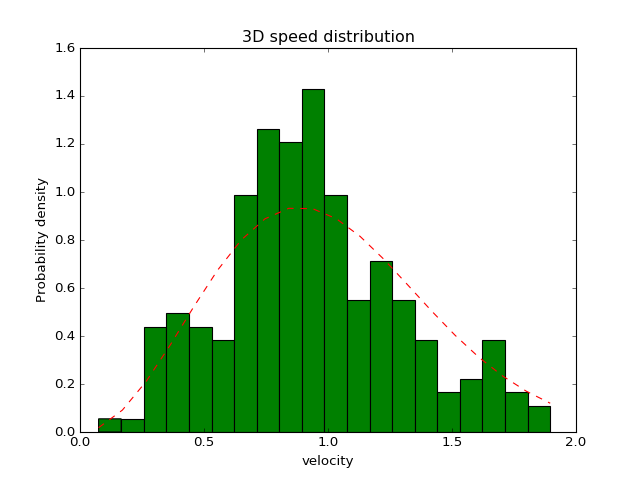

In [4]:
%matplotlib notebook
#alpha is a constant = 2kT/m
alpha = ((system.average_speed)**2) * np.pi / (4)

@np.vectorize
def f(v):
    return ((1/(alpha*np.pi))**(1.5)) * (4*np.pi*((v)**2)) * np.exp(-(v**2)/alpha)

values, bins, __ = plt.hist(system.speeds, 20, normed = True, facecolor='green')
v = np.linspace(np.amin(system.speeds),np.amax(system.speeds),20)
l = plt.plot(v, f(v), 'r--', linewidth=1)
plt.ylabel('Probability density')
plt.xlabel('velocity')
plt.title('3D speed distribution')
plt.show()